# Influence Line: Support Reaktion

This example demonstrates how to compute the influence line for the vertical support reaction $f_z$ at node 2 of a simple two-span bar system.

Influence lines for support reactions follow a similar concept as influence lines for internal forces:
- The structure is modified by releasing the support in the direction of the reaction to be investigated.
- A unit deformation, corresponding to the reaction type, is then applied at the released degree of freedom.

As long as the modified structure remains stable and solvable using the displacement method,
the resulting deformation field of the system directly represents the influence line of the support reaction.

In this example, releasing the vertical support at node 2 does not destabilize the structure.
Therefore, the computed influence line describes how a unit moving load along the beam affects the
vertical reaction at node 2.

You can find the example as an executable Python file [here](https://github.com/i4s-htwk/sStatics/blob/main/sstatics/examples/06_influence_line/force/02_node_fz_influence_line_stable.py).

## Import Modules
We start by importing the required classes needed to set up the structure and define the  
`InfluenceLine` instance:

In [1]:
from sstatics.core.preprocessing import (
    Node, Bar, Material, CrossSection, System
)
from sstatics.core.calc_methods import InfluenceLine

## Create System
We first define the material, cross-section, nodes, and bars for the simple two-span bar system:

In [2]:
# 1. Define material and cross-section
mat = Material(21000, 0.1, 8100, 0.1)          # S235
cs = CrossSection(2769, 76.84, 20, 10, 0.1)   # HEA-240

# 2. Define nodes with supports
node_1 = Node(0, 0, u='fixed', w='fixed')
node_2 = Node(300, 0, w='fixed')
node_3 = Node(600, 0, w='fixed')

# 3. Define bars and system
bar_1 = Bar(node_1, node_2, cs, mat)
bar_2 = Bar(node_2, node_3, cs, mat)
system = System([bar_1, bar_2])

## Create Influence-Line
We now create an `InfluenceLine` object that performs the computation:

In [3]:
# 4. Define Influence line
il = InfluenceLine(system)

### Compute Influence Line for Support Reaction $f_z$

To compute the influence line of the support reaction $f_z$ at `node_2`, we specify:

- force type: `'fz'`
- object: `node_2`

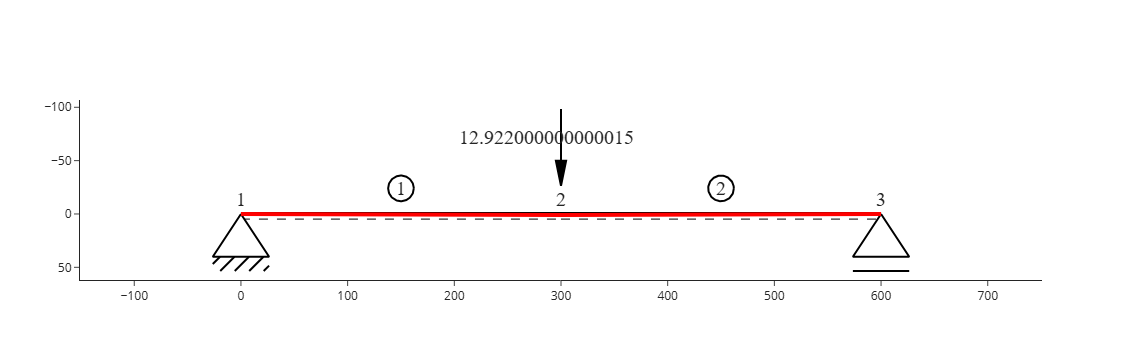

In [5]:
il.force(kind='fz', obj=node_2)